In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [20]:
#This is the size of the training set
observations = 1000

xs = np.random.uniform(-10,10,size = (observations,1))
zs = np.random.uniform(-10,10,size = (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('Basic_NN_TF.npz', inputs = generated_inputs, targets = generated_targets)


Solving with Tensorflow

In [21]:
training_data = np.load('Basic_NN_TF.npz')

In [22]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([tf.keras.layers.Dense(output_size,
                                                kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                  bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                  )
                            ]) 

custom_optimizer = tf.keras.optimizers.SGD(learning_rate  = 0.02)
model.compile(optimizer = custom_optimizer, loss = 'mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose = 2)

Epoch 1/100
32/32 - 0s - loss: 22.9215
Epoch 2/100
32/32 - 0s - loss: 1.1649
Epoch 3/100
32/32 - 0s - loss: 0.4477
Epoch 4/100
32/32 - 0s - loss: 0.3707
Epoch 5/100
32/32 - 0s - loss: 0.3681
Epoch 6/100
32/32 - 0s - loss: 0.3741
Epoch 7/100
32/32 - 0s - loss: 0.3744
Epoch 8/100
32/32 - 0s - loss: 0.4011
Epoch 9/100
32/32 - 0s - loss: 0.3668
Epoch 10/100
32/32 - 0s - loss: 0.3880
Epoch 11/100
32/32 - 0s - loss: 0.3873
Epoch 12/100
32/32 - 0s - loss: 0.3504
Epoch 13/100
32/32 - 0s - loss: 0.3664
Epoch 14/100
32/32 - 0s - loss: 0.3952
Epoch 15/100
32/32 - 0s - loss: 0.3820
Epoch 16/100
32/32 - 0s - loss: 0.4118
Epoch 17/100
32/32 - 0s - loss: 0.4225
Epoch 18/100
32/32 - 0s - loss: 0.4367
Epoch 19/100
32/32 - 0s - loss: 0.3885
Epoch 20/100
32/32 - 0s - loss: 0.3562
Epoch 21/100
32/32 - 0s - loss: 0.3841
Epoch 22/100
32/32 - 0s - loss: 0.4145
Epoch 23/100
32/32 - 0s - loss: 0.3850
Epoch 24/100
32/32 - 0s - loss: 0.3620
Epoch 25/100
32/32 - 0s - loss: 0.3703
Epoch 26/100
32/32 - 0s - loss: 0

In [23]:
model.layers[0].get_weights()

[array([[ 2.03957 ],
        [-3.010931]], dtype=float32),
 array([5.0007358], dtype=float32)]

In [25]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

Making the predictions

In [27]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[-15.1],
       [  3.1],
       [-31.8],
       [  2.6],
       [ 34.5],
       [ 10.2],
       [  3.7],
       [ 12.3],
       [  8.9],
       [ 28.1],
       [ 11.9],
       [ 18.9],
       [ 11.8],
       [ 19.4],
       [ 12.4],
       [ -8.5],
       [-22.3],
       [-15.1],
       [ 20.3],
       [ 23.6],
       [-11.6],
       [ 40.9],
       [ 17.9],
       [ 19.6],
       [ 21.7],
       [ 34.7],
       [-14.5],
       [-32.5],
       [ -1.4],
       [ 30.4],
       [ 28.9],
       [ -0.4],
       [ 12.8],
       [ -8.6],
       [ 38.1],
       [-21.8],
       [-38.5],
       [  7.9],
       [ -6.1],
       [ 32. ],
       [ 18.1],
       [-18.6],
       [ 36.3],
       [-35.2],
       [ 11.4],
       [  5.6],
       [ 21.2],
       [ 34.1],
       [-11.6],
       [  7.6],
       [ 30.9],
       [-13. ],
       [ -0.7],
       [  1.6],
       [ 17.9],
       [-40. ],
       [-27.7],
       [-15.5],
       [  8.6],
       [ 29.4],
       [ 19.6],
       [ 23.8],
       [

Plotting the data

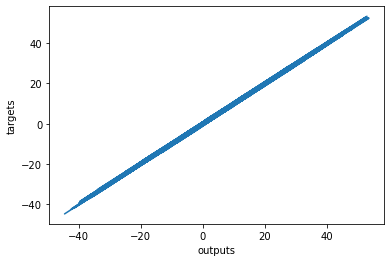

In [29]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()